In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                     mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(mini_pieman.all(), mask='data/pieman_data/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

09/05/2018 17:31:33 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)
09/05/2018 17:31:34 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)
09/05/2018 17:31:36 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)


In [6]:
dtfa.normalize_activations()

[tensor(10.8725), tensor(9.7904), tensor(8.5388)]

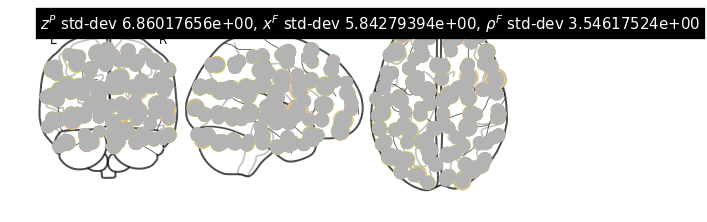

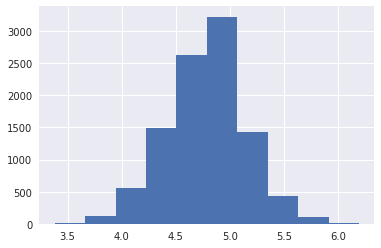

(<nilearn.plotting.displays.OrthoProjector at 0x7f602d213b70>,
 tensor([[[-5.5418e+01, -5.5548e+01,  4.5367e+01],
          [ 4.4082e+00,  1.0316e+01,  4.7749e+00],
          [-3.4294e+01, -2.4740e+01, -8.1075e+00],
          ...,
          [ 1.1812e+01, -4.1611e+01, -3.2200e+01],
          [-9.8128e+00, -7.3606e+01, -8.3846e+00],
          [-2.1965e+01,  1.1817e+01,  2.8388e+01]],
 
         [[-5.4611e+01, -5.5721e+01,  4.5196e+01],
          [ 4.1311e+00,  1.0923e+01,  4.3692e+00],
          [-3.4583e+01, -2.4918e+01, -8.0713e+00],
          ...,
          [ 1.1079e+01, -4.1164e+01, -3.1781e+01],
          [-9.7757e+00, -7.3153e+01, -8.0760e+00],
          [-2.1800e+01,  1.1311e+01,  2.8255e+01]],
 
         [[-5.5475e+01, -5.5501e+01,  4.5370e+01],
          [ 4.4529e+00,  1.0258e+01,  4.7900e+00],
          [-3.4263e+01, -2.4715e+01, -8.1653e+00],
          ...,
          [ 1.1905e+01, -4.1665e+01, -3.2257e+01],
          [-9.8350e+00, -7.3580e+01, -8.4013e+00],
          [-2.1966e

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=700, learning_rate=1e-1, log_level=logging.INFO, num_particles=2,
                    batch_size=100, use_cuda=True, blocks_batch_size=8, patience=50)

09/05/2018 17:33:28 [Epoch 1] (1422ms) Posterior free-energy 1.55086480e+08 = KL from prior 1.36948525e+04 - log-likelihood -1.55072780e+08
09/05/2018 17:33:29 [Epoch 2] (1248ms) Posterior free-energy 1.48810176e+08 = KL from prior 1.78325674e+04 - log-likelihood -1.48792340e+08
09/05/2018 17:33:30 [Epoch 3] (1224ms) Posterior free-energy 1.43115072e+08 = KL from prior 2.31947495e+04 - log-likelihood -1.43091888e+08
09/05/2018 17:33:32 [Epoch 4] (1210ms) Posterior free-energy 1.42733344e+08 = KL from prior 2.79536797e+04 - log-likelihood -1.42705388e+08
09/05/2018 17:33:33 [Epoch 5] (1225ms) Posterior free-energy 1.39555776e+08 = KL from prior 3.44476670e+04 - log-likelihood -1.39521328e+08
09/05/2018 17:33:34 [Epoch 6] (1233ms) Posterior free-energy 1.35074896e+08 = KL from prior 4.01507422e+04 - log-likelihood -1.35034748e+08
09/05/2018 17:33:35 [Epoch 7] (1241ms) Posterior free-energy 1.35809200e+08 = KL from prior 4.64224746e+04 - log-likelihood -1.35762780e+08
09/05/2018 17:33:36 

Epoch   147: reducing learning rate of group 0 to 5.0000e-02.


09/05/2018 17:36:32 [Epoch 149] (1239ms) Posterior free-energy 1.18109680e+08 = KL from prior 2.48306211e+05 - log-likelihood -1.17861372e+08
09/05/2018 17:36:34 [Epoch 150] (1223ms) Posterior free-energy 1.16896816e+08 = KL from prior 2.51832977e+05 - log-likelihood -1.16644988e+08
09/05/2018 17:36:35 [Epoch 151] (1224ms) Posterior free-energy 1.18039520e+08 = KL from prior 2.51170797e+05 - log-likelihood -1.17788344e+08
09/05/2018 17:36:36 [Epoch 152] (1237ms) Posterior free-energy 1.18299024e+08 = KL from prior 2.51729617e+05 - log-likelihood -1.18047284e+08
09/05/2018 17:36:37 [Epoch 153] (1270ms) Posterior free-energy 1.18229664e+08 = KL from prior 2.52542109e+05 - log-likelihood -1.17977128e+08
09/05/2018 17:36:39 [Epoch 154] (1266ms) Posterior free-energy 1.17646640e+08 = KL from prior 2.49155055e+05 - log-likelihood -1.17397480e+08
09/05/2018 17:36:40 [Epoch 155] (1236ms) Posterior free-energy 1.17421776e+08 = KL from prior 2.51086297e+05 - log-likelihood -1.17170692e+08
09/05/

Epoch   198: reducing learning rate of group 0 to 2.5000e-02.


09/05/2018 17:37:38 [Epoch 200] (1284ms) Posterior free-energy 1.17563224e+08 = KL from prior 2.60811875e+05 - log-likelihood -1.17302412e+08
09/05/2018 17:37:39 [Epoch 201] (1326ms) Posterior free-energy 1.17041360e+08 = KL from prior 2.58761891e+05 - log-likelihood -1.16782592e+08
09/05/2018 17:37:41 [Epoch 202] (1291ms) Posterior free-energy 1.17024168e+08 = KL from prior 2.58985266e+05 - log-likelihood -1.16765180e+08
09/05/2018 17:37:42 [Epoch 203] (1291ms) Posterior free-energy 1.16938672e+08 = KL from prior 2.61844023e+05 - log-likelihood -1.16676836e+08
09/05/2018 17:37:43 [Epoch 204] (1286ms) Posterior free-energy 1.16424624e+08 = KL from prior 2.58943453e+05 - log-likelihood -1.16165672e+08
09/05/2018 17:37:45 [Epoch 205] (1298ms) Posterior free-energy 1.17198096e+08 = KL from prior 2.59924086e+05 - log-likelihood -1.16938168e+08
09/05/2018 17:37:46 [Epoch 206] (1289ms) Posterior free-energy 1.17485552e+08 = KL from prior 2.59178570e+05 - log-likelihood -1.17226380e+08
09/05/

Epoch   335: reducing learning rate of group 0 to 1.2500e-02.


09/05/2018 17:40:35 [Epoch 337] (1297ms) Posterior free-energy 1.15509824e+08 = KL from prior 2.72733836e+05 - log-likelihood -1.15237092e+08
09/05/2018 17:40:37 [Epoch 338] (1289ms) Posterior free-energy 1.17404880e+08 = KL from prior 2.67765141e+05 - log-likelihood -1.17137120e+08
09/05/2018 17:40:38 [Epoch 339] (1278ms) Posterior free-energy 1.16293328e+08 = KL from prior 2.67791070e+05 - log-likelihood -1.16025544e+08
09/05/2018 17:40:39 [Epoch 340] (1289ms) Posterior free-energy 1.17396792e+08 = KL from prior 2.68761102e+05 - log-likelihood -1.17128024e+08
09/05/2018 17:40:41 [Epoch 341] (1281ms) Posterior free-energy 1.16983512e+08 = KL from prior 2.69565516e+05 - log-likelihood -1.16713944e+08
09/05/2018 17:40:42 [Epoch 342] (1272ms) Posterior free-energy 1.16074544e+08 = KL from prior 2.71039078e+05 - log-likelihood -1.15803500e+08
09/05/2018 17:40:43 [Epoch 343] (1280ms) Posterior free-energy 1.16797888e+08 = KL from prior 2.70018578e+05 - log-likelihood -1.16527864e+08
09/05/

Epoch   386: reducing learning rate of group 0 to 6.2500e-03.


09/05/2018 17:41:41 [Epoch 388] (1272ms) Posterior free-energy 1.16389728e+08 = KL from prior 2.71252359e+05 - log-likelihood -1.16118484e+08
09/05/2018 17:41:42 [Epoch 389] (1275ms) Posterior free-energy 1.16688480e+08 = KL from prior 2.70465680e+05 - log-likelihood -1.16418016e+08
09/05/2018 17:41:43 [Epoch 390] (1277ms) Posterior free-energy 1.16375360e+08 = KL from prior 2.70735625e+05 - log-likelihood -1.16104624e+08
09/05/2018 17:41:45 [Epoch 391] (1285ms) Posterior free-energy 1.16336448e+08 = KL from prior 2.70933648e+05 - log-likelihood -1.16065512e+08
09/05/2018 17:41:46 [Epoch 392] (1295ms) Posterior free-energy 1.16337400e+08 = KL from prior 2.72508242e+05 - log-likelihood -1.16064892e+08
09/05/2018 17:41:47 [Epoch 393] (1289ms) Posterior free-energy 1.16815280e+08 = KL from prior 2.71379164e+05 - log-likelihood -1.16543896e+08
09/05/2018 17:41:49 [Epoch 394] (1279ms) Posterior free-energy 1.15479600e+08 = KL from prior 2.70036703e+05 - log-likelihood -1.15209572e+08
09/05/

Epoch   437: reducing learning rate of group 0 to 3.1250e-03.


09/05/2018 17:42:46 [Epoch 439] (1295ms) Posterior free-energy 1.16794432e+08 = KL from prior 2.71501406e+05 - log-likelihood -1.16522932e+08
09/05/2018 17:42:47 [Epoch 440] (1290ms) Posterior free-energy 1.16177488e+08 = KL from prior 2.72028789e+05 - log-likelihood -1.15905464e+08
09/05/2018 17:42:49 [Epoch 441] (1285ms) Posterior free-energy 1.17203496e+08 = KL from prior 2.72924156e+05 - log-likelihood -1.16930568e+08
09/05/2018 17:42:50 [Epoch 442] (1281ms) Posterior free-energy 1.16831512e+08 = KL from prior 2.71053992e+05 - log-likelihood -1.16560452e+08
09/05/2018 17:42:51 [Epoch 443] (1283ms) Posterior free-energy 1.15908992e+08 = KL from prior 2.71564359e+05 - log-likelihood -1.15637428e+08
09/05/2018 17:42:53 [Epoch 444] (1284ms) Posterior free-energy 1.16294272e+08 = KL from prior 2.71630000e+05 - log-likelihood -1.16022640e+08
09/05/2018 17:42:54 [Epoch 445] (1287ms) Posterior free-energy 1.16348424e+08 = KL from prior 2.69873125e+05 - log-likelihood -1.16078552e+08
09/05/

Epoch   523: reducing learning rate of group 0 to 1.5625e-03.


09/05/2018 17:44:36 [Epoch 525] (1259ms) Posterior free-energy 1.15969288e+08 = KL from prior 2.69879125e+05 - log-likelihood -1.15699400e+08
09/05/2018 17:44:37 [Epoch 526] (1264ms) Posterior free-energy 1.16400432e+08 = KL from prior 2.73554180e+05 - log-likelihood -1.16126868e+08
09/05/2018 17:44:39 [Epoch 527] (1261ms) Posterior free-energy 1.15729720e+08 = KL from prior 2.72528539e+05 - log-likelihood -1.15457192e+08
09/05/2018 17:44:40 [Epoch 528] (1263ms) Posterior free-energy 1.17244656e+08 = KL from prior 2.75516117e+05 - log-likelihood -1.16969140e+08
09/05/2018 17:44:41 [Epoch 529] (1253ms) Posterior free-energy 1.16241280e+08 = KL from prior 2.73835109e+05 - log-likelihood -1.15967444e+08
09/05/2018 17:44:43 [Epoch 530] (1268ms) Posterior free-energy 1.16185904e+08 = KL from prior 2.71533883e+05 - log-likelihood -1.15914376e+08
09/05/2018 17:44:44 [Epoch 531] (1260ms) Posterior free-energy 1.16603424e+08 = KL from prior 2.73742273e+05 - log-likelihood -1.16329688e+08
09/05/

Epoch   574: reducing learning rate of group 0 to 7.8125e-04.


09/05/2018 17:45:41 [Epoch 576] (1257ms) Posterior free-energy 1.15518624e+08 = KL from prior 2.72874039e+05 - log-likelihood -1.15245744e+08
09/05/2018 17:45:42 [Epoch 577] (1250ms) Posterior free-energy 1.15456992e+08 = KL from prior 2.72057375e+05 - log-likelihood -1.15184936e+08
09/05/2018 17:45:43 [Epoch 578] (1268ms) Posterior free-energy 1.14811184e+08 = KL from prior 2.73768477e+05 - log-likelihood -1.14537420e+08
09/05/2018 17:45:44 [Epoch 579] (1267ms) Posterior free-energy 1.15504768e+08 = KL from prior 2.73106742e+05 - log-likelihood -1.15231656e+08
09/05/2018 17:45:46 [Epoch 580] (1268ms) Posterior free-energy 1.16449520e+08 = KL from prior 2.73821234e+05 - log-likelihood -1.16175696e+08
09/05/2018 17:45:47 [Epoch 581] (1274ms) Posterior free-energy 1.16084320e+08 = KL from prior 2.72996016e+05 - log-likelihood -1.15811328e+08
09/05/2018 17:45:48 [Epoch 582] (1265ms) Posterior free-energy 1.15653888e+08 = KL from prior 2.70805031e+05 - log-likelihood -1.15383076e+08
09/05/

Epoch   628: reducing learning rate of group 0 to 3.9063e-04.


09/05/2018 17:46:49 [Epoch 630] (1267ms) Posterior free-energy 1.15658688e+08 = KL from prior 2.74058078e+05 - log-likelihood -1.15384632e+08
09/05/2018 17:46:50 [Epoch 631] (1266ms) Posterior free-energy 1.16315712e+08 = KL from prior 2.75284953e+05 - log-likelihood -1.16040420e+08
09/05/2018 17:46:52 [Epoch 632] (1266ms) Posterior free-energy 1.15667040e+08 = KL from prior 2.72179375e+05 - log-likelihood -1.15394864e+08
09/05/2018 17:46:53 [Epoch 633] (1272ms) Posterior free-energy 1.16112944e+08 = KL from prior 2.71160867e+05 - log-likelihood -1.15841784e+08
09/05/2018 17:46:54 [Epoch 634] (1274ms) Posterior free-energy 1.16904616e+08 = KL from prior 2.70345617e+05 - log-likelihood -1.16634272e+08
09/05/2018 17:46:55 [Epoch 635] (1261ms) Posterior free-energy 1.18260600e+08 = KL from prior 2.72270219e+05 - log-likelihood -1.17988328e+08
09/05/2018 17:46:57 [Epoch 636] (1255ms) Posterior free-energy 1.18820864e+08 = KL from prior 2.73533164e+05 - log-likelihood -1.18547328e+08
09/05/

Epoch   679: reducing learning rate of group 0 to 1.9531e-04.


09/05/2018 17:47:54 [Epoch 681] (1277ms) Posterior free-energy 1.15063888e+08 = KL from prior 2.71480414e+05 - log-likelihood -1.14792400e+08
09/05/2018 17:47:55 [Epoch 682] (1268ms) Posterior free-energy 1.16558368e+08 = KL from prior 2.74015250e+05 - log-likelihood -1.16284352e+08
09/05/2018 17:47:56 [Epoch 683] (1261ms) Posterior free-energy 1.14998760e+08 = KL from prior 2.71782125e+05 - log-likelihood -1.14726972e+08
09/05/2018 17:47:57 [Epoch 684] (1257ms) Posterior free-energy 1.15932872e+08 = KL from prior 2.72933453e+05 - log-likelihood -1.15659940e+08
09/05/2018 17:47:59 [Epoch 685] (1259ms) Posterior free-energy 1.16431152e+08 = KL from prior 2.74179672e+05 - log-likelihood -1.16156976e+08
09/05/2018 17:48:00 [Epoch 686] (1267ms) Posterior free-energy 1.15915184e+08 = KL from prior 2.70181125e+05 - log-likelihood -1.15645004e+08
09/05/2018 17:48:01 [Epoch 687] (1264ms) Posterior free-energy 1.16314384e+08 = KL from prior 2.73302609e+05 - log-likelihood -1.16041084e+08
09/05/

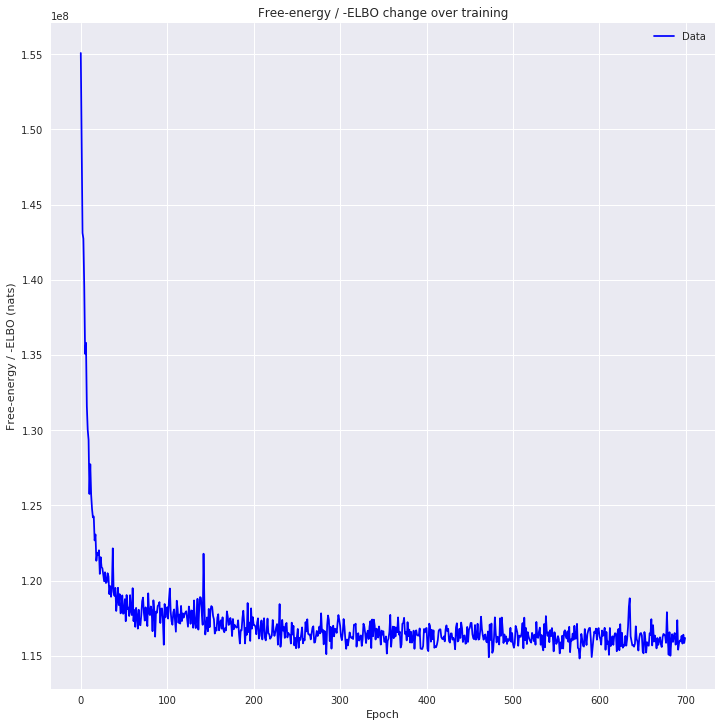

In [9]:
utils.plot_losses(losses)

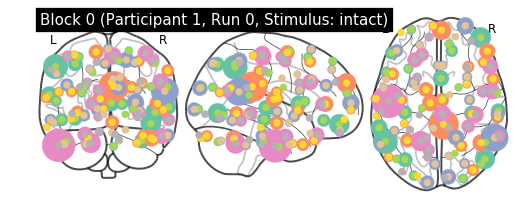

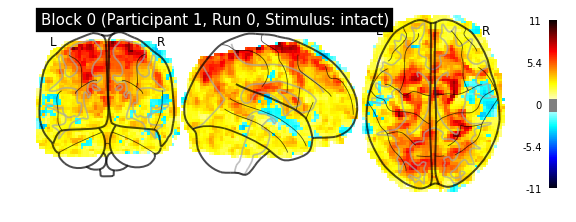

09/05/2018 17:48:45 Reconstruction Error (Frobenius Norm): 4.98707129e+03 out of 5.08479883e+03


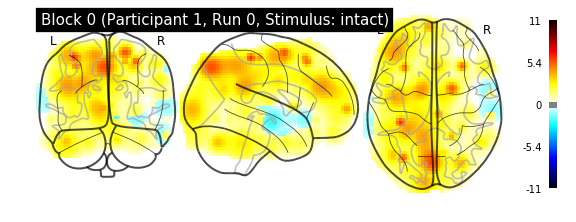

{'weights': tensor([[ 3.2732,  1.8654, -0.5035,  ...,  1.0552,  1.2135,  3.4545],
        [ 2.3541, -0.2084, -1.9946,  ...,  0.5065, -1.7910,  2.8536],
        [ 1.8485, -1.1363, -2.6698,  ...,  0.6556, -2.0442,  1.9494],
        ...,
        [ 1.2948, -0.4852, -2.0393,  ...,  0.6832,  2.0150,  0.5874],
        [ 1.5857, -1.2577, -2.5118,  ...,  0.7191,  2.8861,  0.2728],
        [ 2.2356, -1.0491, -1.6053,  ...,  1.5687,  3.4238,  1.1101]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), 'factor_centers': tensor([[-54.6986, -56.1916,  45.4586],
        [  5.3871,  11.0536,   5.3223],
        [

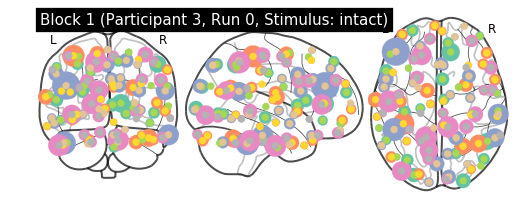

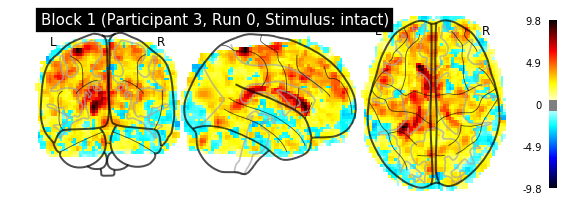

09/05/2018 17:49:12 Reconstruction Error (Frobenius Norm): 5.06731055e+03 out of 5.19534326e+03


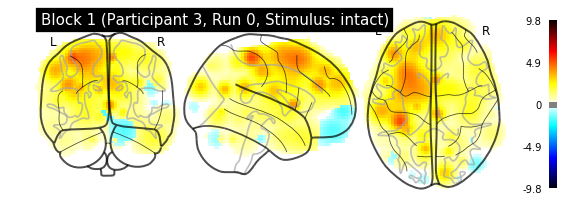

{'weights': tensor([[ 3.4429e-01,  2.4168e+00, -6.1051e-01,  ...,  1.7512e+00,
          2.6089e+00,  2.2315e+00],
        [-2.3968e-01, -5.8294e-01, -2.0650e+00,  ...,  9.3847e-01,
         -2.4839e-01,  1.1097e+00],
        [-5.9030e-01, -5.8538e-01, -1.8509e+00,  ...,  9.7744e-01,
         -3.8734e-01,  4.4179e-02],
        ...,
        [ 7.5999e-01, -9.6402e-01, -1.4120e+00,  ...,  1.6086e+00,
          4.6321e+00, -6.2902e-01],
        [ 1.3477e+00, -1.2393e+00, -1.7108e+00,  ...,  8.4763e-01,
          4.0512e+00, -5.2018e-01],
        [ 1.3412e+00,  3.2005e-01, -1.9872e+00,  ...,  1.0663e-01,
          4.3695e+00, -1.3844e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

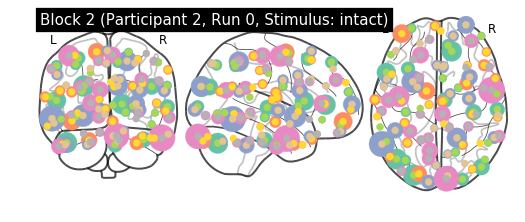

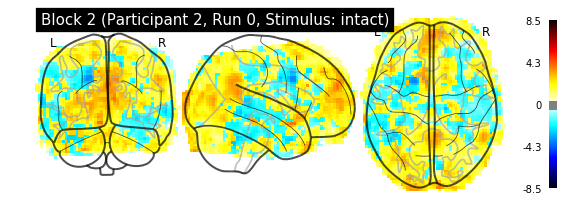

09/05/2018 17:49:40 Reconstruction Error (Frobenius Norm): 4.84198633e+03 out of 5.19534229e+03


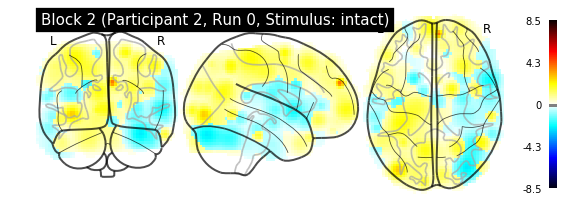

{'weights': tensor([[ 1.4892e+00,  1.4052e+00, -1.2250e+00,  ...,  2.9268e-01,
          2.3113e+00, -1.1235e+00],
        [ 8.6707e-01,  1.4147e+00, -1.2224e+00,  ..., -7.4073e-01,
          2.3526e+00,  2.8935e-01],
        [ 7.2680e-01,  7.8429e-01, -9.2666e-01,  ...,  3.6463e-01,
          2.7217e+00,  3.9044e-01],
        ...,
        [ 2.6930e+00,  7.2415e-01,  3.7624e-01,  ...,  1.6978e+00,
          3.4833e+00,  1.4327e+00],
        [ 2.7037e+00,  3.9791e-01, -7.2034e-02,  ...,  1.3511e+00,
          1.6434e+00,  2.2566e-01],
        [ 2.9289e+00, -1.3379e-02, -4.8122e-01,  ..., -1.4519e-01,
          9.2449e-01,  1.1280e-02]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

In [10]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)
    print(dtfa.results(b))

In [11]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


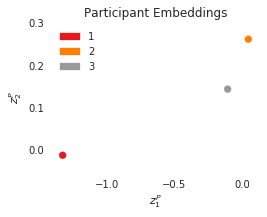

In [12]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


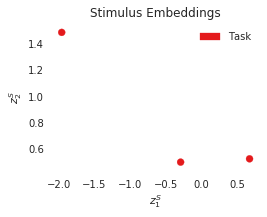

In [13]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler)

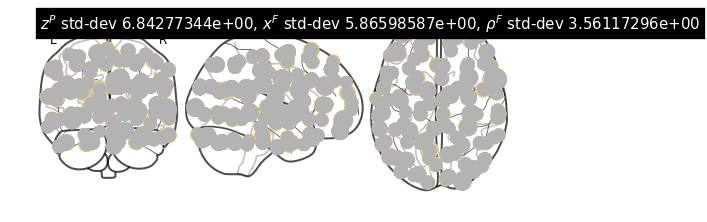

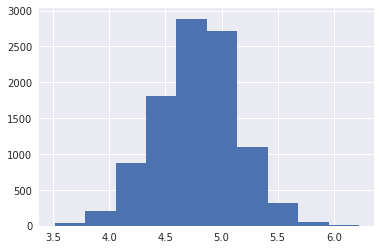

(<nilearn.plotting.displays.OrthoProjector at 0x7f5fdcd26b38>,
 tensor([[[-5.5157e+01, -5.5341e+01,  4.5193e+01],
          [ 4.2309e+00,  1.0489e+01,  4.2955e+00],
          [-3.4176e+01, -2.4754e+01, -8.3583e+00],
          ...,
          [ 1.2108e+01, -4.1767e+01, -3.2620e+01],
          [-9.9843e+00, -7.3519e+01, -8.0936e+00],
          [-2.2045e+01,  1.1843e+01,  2.8432e+01]],
 
         [[-5.4862e+01, -5.5755e+01,  4.5407e+01],
          [ 4.2382e+00,  1.0405e+01,  4.8510e+00],
          [-3.4644e+01, -2.4714e+01, -7.9590e+00],
          ...,
          [ 1.1286e+01, -4.1238e+01, -3.1706e+01],
          [-9.7952e+00, -7.3136e+01, -8.5079e+00],
          [-2.1345e+01,  1.1248e+01,  2.8132e+01]],
 
         [[-5.4799e+01, -5.5496e+01,  4.5220e+01],
          [ 4.0032e+00,  1.0541e+01,  3.9967e+00],
          [-3.4445e+01, -2.4910e+01, -8.3534e+00],
          ...,
          [ 1.1789e+01, -4.1421e+01, -3.2243e+01],
          [-1.0113e+01, -7.3245e+01, -8.1000e+00],
          [-2.1749e

In [14]:
dtfa.visualize_factor_embedding()

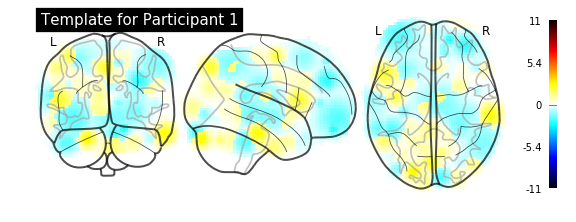

In [15]:
dtfa.plot_subject_template(1)

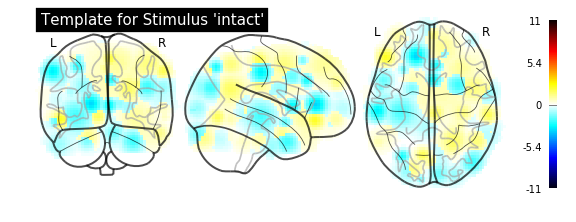

In [16]:
dtfa.plot_task_template('intact')